In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [237]:
job="software_engineer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [238]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Microsoft,Senior Software Engineer,Bengaluru,600000.0,"TensorFlow, C++, C, Deep learning, SDKs",4.2,Software Engineer
1,Goldman Sachs,Software Engineer - Vice President - Core Engi...,Hyderābād,0.0,"CI/CD, React, Kubernetes, Relational databases...",3.9,Software Engineer
2,Trellix,Senior Software Development Engineer,Bengaluru,750000.0,"Oracle, SAP HANA, DB2, Microsoft SQL Server, N...",3.4,Software Engineer
3,Oracle,Software Developer,Hyderābād,800000.0,"Oracle, JUnit, XML, Enterprise Software, J2EE",3.8,Software Engineer
4,infiniti soft system,Software Developer,Bengaluru,1400000.0,"Relational databases, Microsoft SQL Server, SS...",NaN,Software Engineer


In [239]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    22
company_rating           182
standardized_job_role      0
dtype: int64

In [240]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [241]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
1,Goldman Sachs,Software Engineer - Vice President - Core Engi...,Hyderābād,0.0,"CI/CD, React, Kubernetes, Relational databases...",3.9,Software Engineer
8,"Signimus Technolgies: Hiring Python, MERN, Rea...",Software Developer Training internship,Remote,0.0,"Git, MongoDB, .NET, Java, Application development",NaN,Software Engineer
17,SOTI Inc.,Junior Software Developer,Cochin,0.0,"Data modeling, Node.js, CSS, C#, .NET",3.6,Software Engineer
19,HyScaler,Junior Software Developer,India,0.0,"Node.js, Databases, SQL, PHP, Docker",4.7,Software Engineer
25,Coinbase,"Staff Software Engineer, Infrastructure - Deve...",Remote,0.0,"Machine learning, Communication skills, SDLC",3.8,Software Engineer
...,...,...,...,...,...,...,...
768,miniOrange,Software Engineer (Java),India,0.0,"SSO, Relational databases, Java, Databases, OOP",3.1,Software Engineer
785,Zikshana,Software Developer,Bengaluru,0.0,"Node.js, CSS, Bootstrap, JavaScript, Angular",NaN,Software Engineer
786,Etasens Technologies,Junior Software Engineer,Chandigarh,0.0,"React, Java, REST, Angular, APIs",3.0,Software Engineer
787,Electronic Arts,Software Engineer,India,0.0,"Unreal Engine, iOS development, iOS, C++, Math",4.1,Software Engineer


### Filling the null values by replacing with average salary of company rating

In [243]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [244]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [245]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Microsoft,Senior Software Engineer,Bengaluru,6.000000,"TensorFlow, C++, C, Deep learning, SDKs",4.2,Software Engineer
1,Goldman Sachs,Software Engineer - Vice President - Core Engi...,Hyderābād,9.950357,"CI/CD, React, Kubernetes, Relational databases...",3.9,Software Engineer
2,Trellix,Senior Software Development Engineer,Bengaluru,7.500000,"Oracle, SAP HANA, DB2, Microsoft SQL Server, N...",3.4,Software Engineer
3,Oracle,Software Developer,Hyderābād,8.000000,"Oracle, JUnit, XML, Enterprise Software, J2EE",3.8,Software Engineer
4,infiniti soft system,Software Developer,Bengaluru,14.000000,"Relational databases, Microsoft SQL Server, SS...",0.0,Software Engineer
...,...,...,...,...,...,...,...
788,BayaTree,Intern: Software Engineering,Mohali,9.345714,Communication skills,4.4,Software Engineer
789,Cubic Corporation,Senior Software Engineer,Hyderābād,6.500000,"Software troubleshooting, Java, SQL, REST, Scrum",3.0,Software Engineer
790,krish technolabs,Jr. Software Developer,Ahmedabad,4.500000,"Magento, Agile, Communication skills",4.3,Software Engineer
791,Oracle,Software Developer for telecommunication,Hyderābād,8.000000,"Jira, Cloud infrastructure, Oracle, DevOps, Java",3.8,Software Engineer


In [246]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [247]:
df.describe()

,salary_lpa,company_rating
count,793.000000,793.000000
mean,9.405298,2.952711
std,8.934700,1.665142
min,0.420000,0.000000
25%,5.500000,2.900000
50%,6.500000,3.700000
75%,9.426848,4.100000
max,48.000000,5.000000


In [248]:
df.nunique()

company_name             562
job_role                 375
job_location              53
salary_lpa               103
skills                   724
company_rating            30
standardized_job_role      1
dtype: int64

In [249]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [251]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [252]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                             Skill  Count
21                            java    200
6                            react    127
5                            ci/cd    113
24                             css    106
29                             git    106
..                             ...    ...
239                            iis      1
238      general ledger accounting      1
141  automotive electrical systems      1
236            accounts receivable      1
321                       weblogic      1

[322 rows x 2 columns]


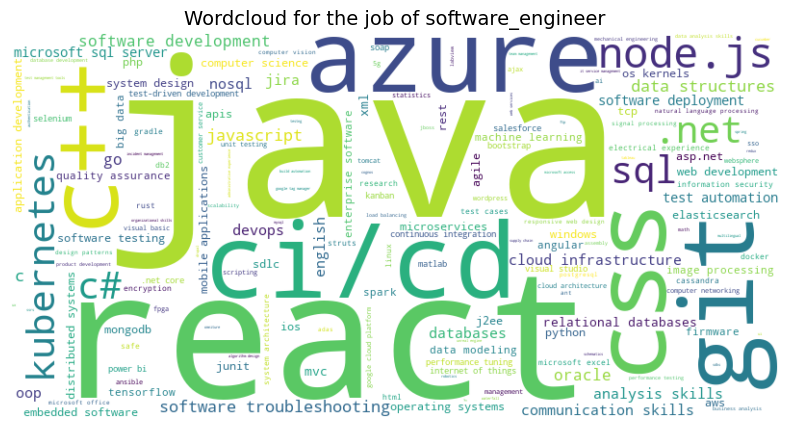

In [253]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


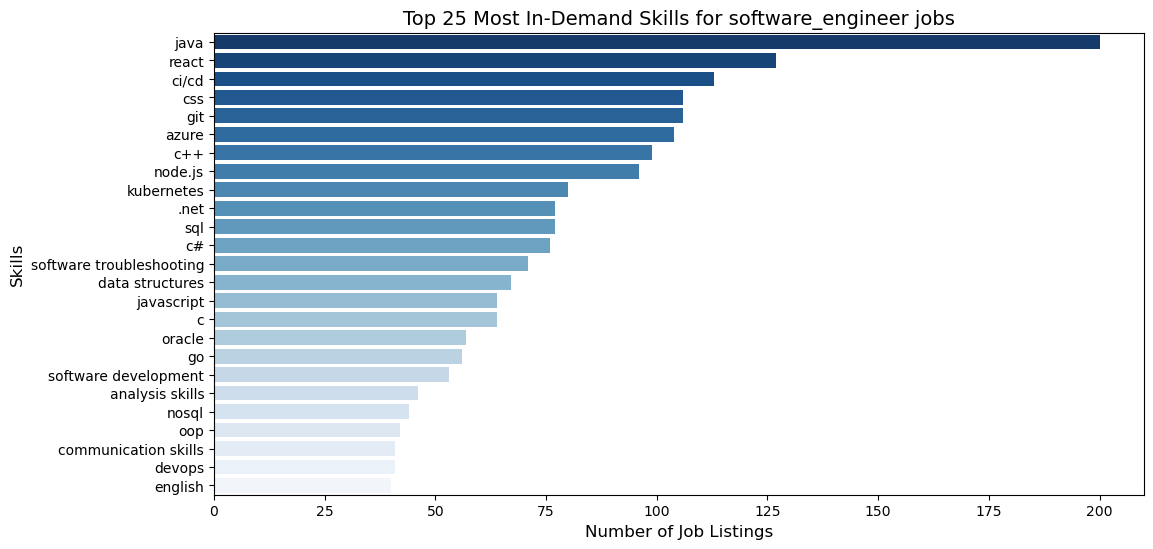

In [254]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [256]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


               company_name  salary_lpa
245  Interface Technologies        48.0
527        Yethi Consulting        48.0
195   Green Apple Solutions        48.0
503          Virim Infotech        48.0
305              Mr. Cooper        48.0
144          Dutech Systems        48.0
198        HCL Technologies        48.0
414    Sadhana IT Solutions        48.0
307                  NASDAQ        48.0
257                  KESDEE        48.0


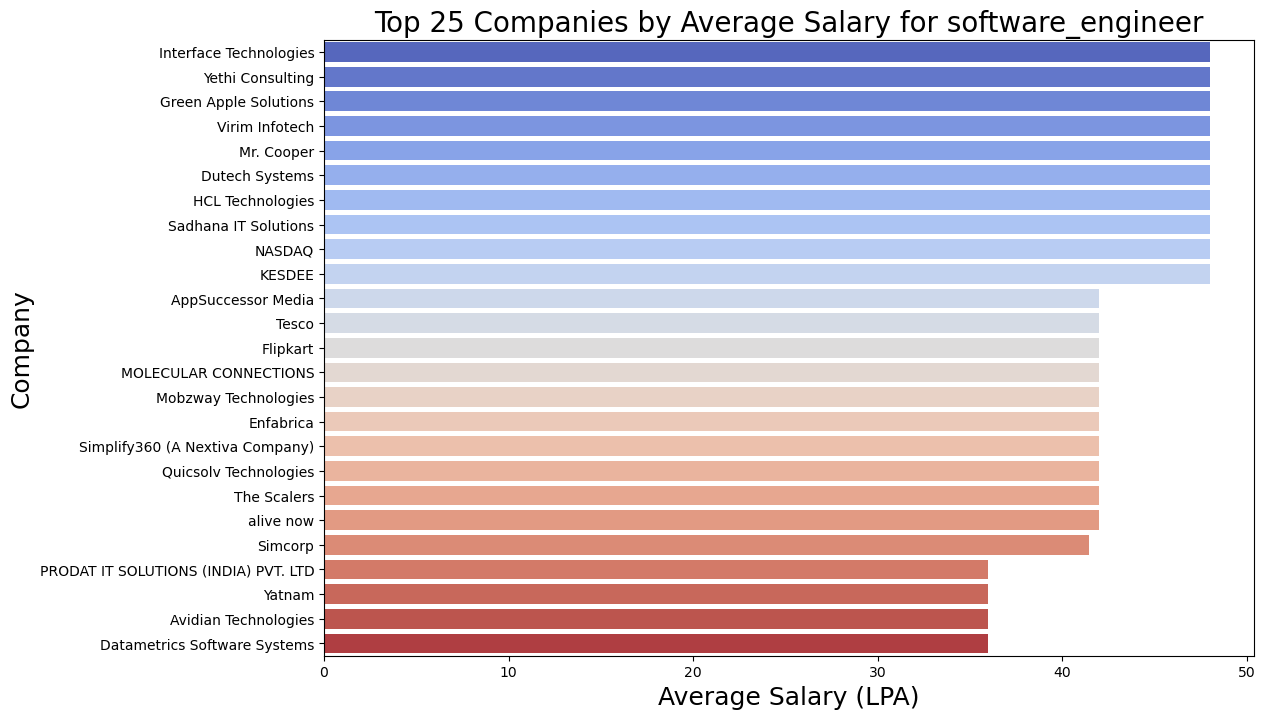

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

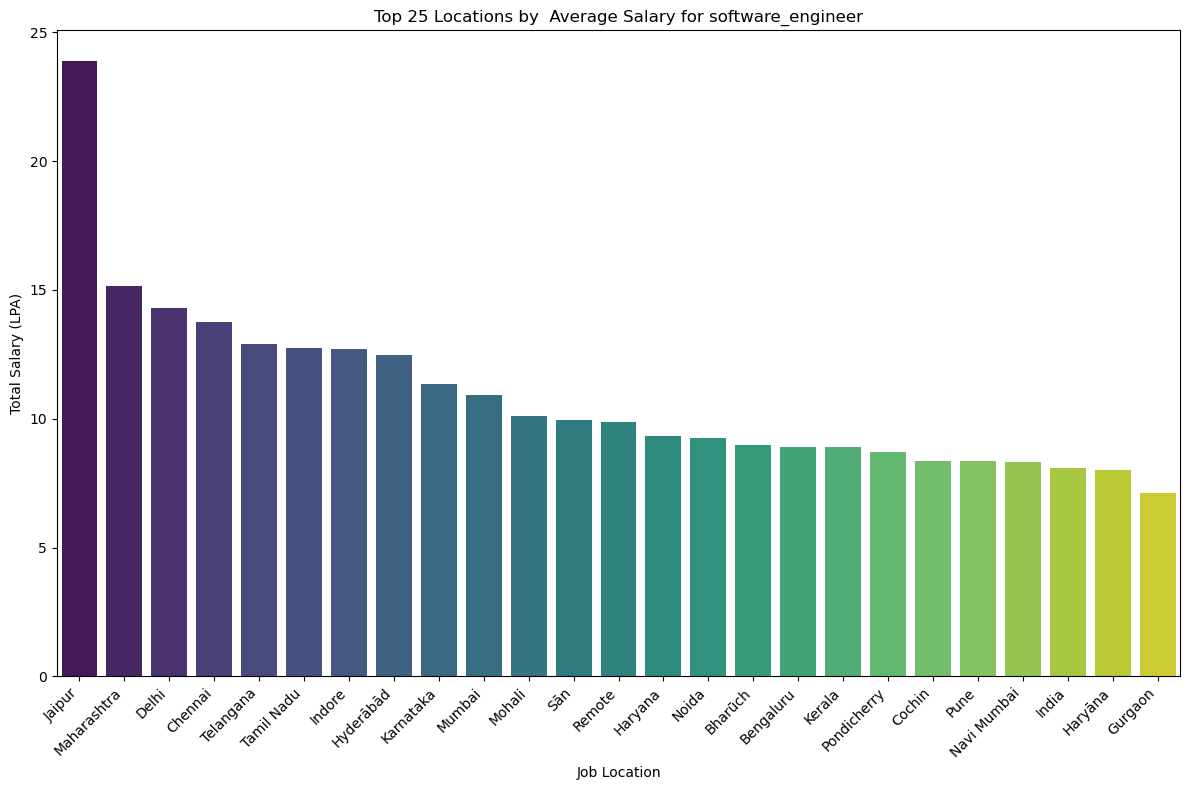

In [259]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

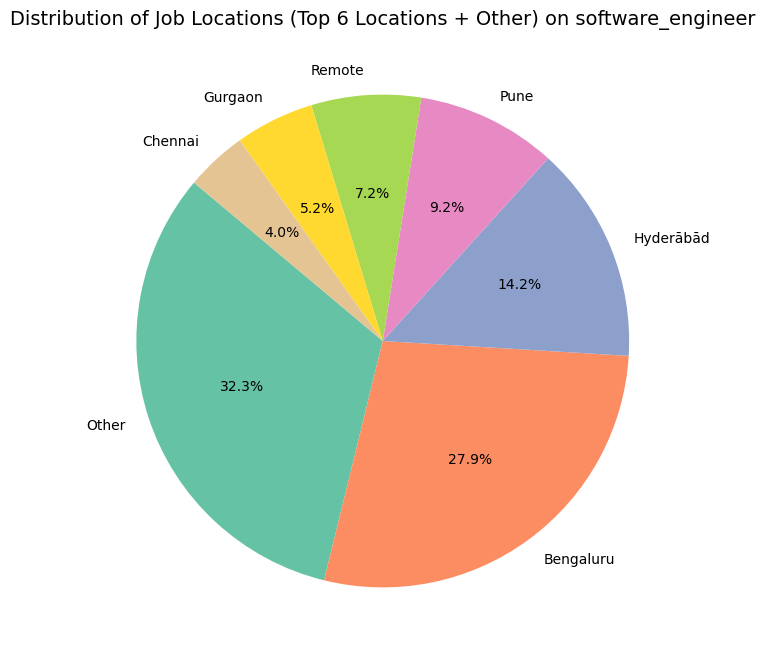

In [260]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

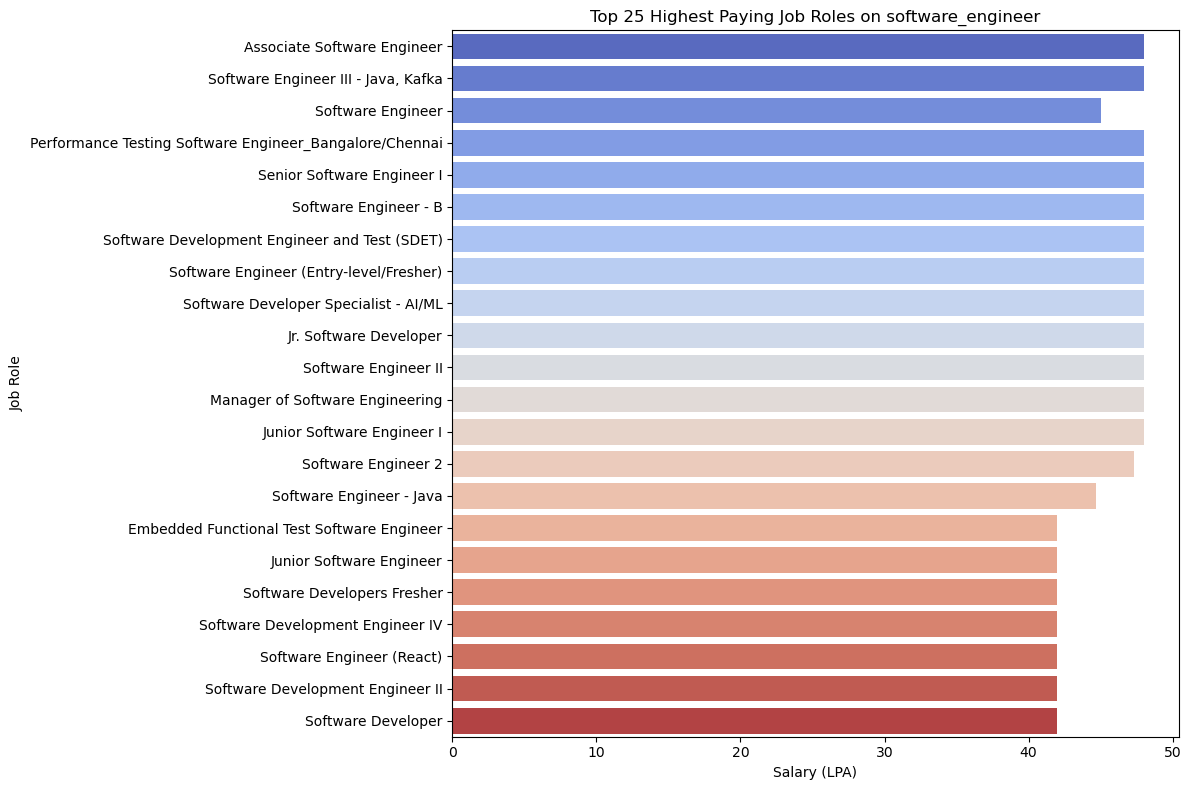

In [262]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [264]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_20196\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


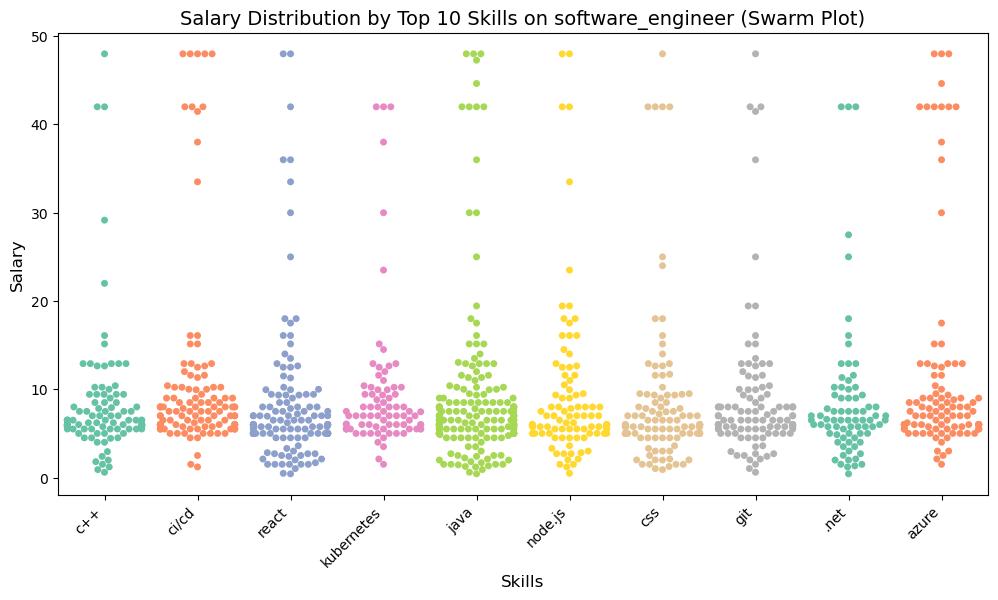

In [265]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

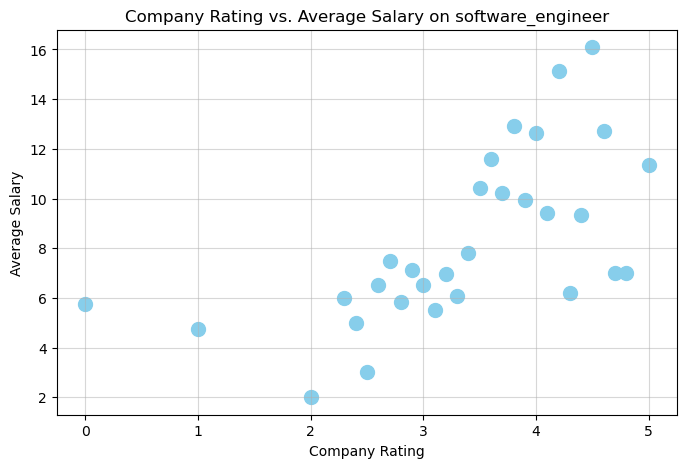

In [267]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [268]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.12488343992706694